Praktikum 1
Komputasi Numerik

William Hans Chandra - 5025241138
Yoseph Kevin Hendrata - 5025241146
Maulana Ikhsan - 5025241163

Program Komputasi Metode Regula Falsi

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, lambdify, sympify, pi, sin, cos, tan, exp, log, ln, sqrt

MAX_ITERATION = 1000000

def user_func(user_input):
    x = symbols('x')
    expr = sympify(user_input)
    return lambdify(x, expr)

def regula_falsi(f, a, b):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) dan f(b) harus memiliki tanda yang berbeda")
    data = []
    c = a
    for i in range(MAX_ITERATION):
        fa = f(a)
        fb = f(b)
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        data.append((i+1, a, b, c, fc))
        if abs(fc) < 1e-6:
            break
        if fa * fc < 0:
            b = c
        else:
            a = c
    return c, data

def plot_function(f, user_input, a, b, akar=None):
    x_vals = np.linspace(a, b, 400)
    y_vals = f(x_vals)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x_vals, y_vals, label=f'f(x) = {user_input}')
    ax.axhline(0, color='black', linewidth=0.5)
    if akar is not None:
        ax.axvline(akar, color='red', linestyle='--', label=f'Akar aproksimasi: {akar:.6f}')
    ax.set_title("Metode Regula Falsi")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.grid(True)
    ax.legend()
    return fig

def main():
    print("=== Panduan Penulisan Fungsi f(x) ===")
    print("Gunakan simbol matematika standar:")
    print("- Pangkat: gunakan '**'")
    print("- Perkalian: gunakan '*'")
    print("- Akar: gunakan 'sqrt(x)'")
    print("- Logaritma natural: gunakan 'ln(x)'")
    print("- Eksponensial: gunakan 'exp(x)'")
    print("- Fungsi lain yang didukung: sin(x), cos(x), tan(x), log(x, base)")
    print("Contoh input valid: x**3 - 2*x + 1, exp(x) - 4, ln(x + 1), sqrt(x)")
    print("====================================")

    user_input = input("Masukkan fungsi f(x): ")
    a = float(input("Masukkan nilai a: "))
    b = float(input("Masukkan nilai b: "))
    f = user_func(user_input)
    akar, iterasi_data = regula_falsi(f, a, b)

    df = pd.DataFrame(iterasi_data, columns=["Iterasi", "a", "b", "c", "f(c)"])
    fig = plot_function(f, user_input, a, b, akar)
    print(f"Total Iterasi: {len(df)}")
    print(f"Akar aproksimasi: {akar:.6f}")
    return df, fig

=== Panduan Penulisan Fungsi f(x) ===
Gunakan simbol matematika standar:
- Pangkat: gunakan '**'
- Perkalian: gunakan '*'
- Akar: gunakan 'sqrt(x)'
- Logaritma natural: gunakan 'ln(x)'
- Eksponensial: gunakan 'exp(x)'
- Fungsi lain yang didukung: sin(x), cos(x), tan(x), log(x, base)
Contoh input valid: x**3 - 2*x + 1, exp(x) - 4, ln(x + 1), sqrt(x)
Total Iterasi: 26
Akar aproksimasi: -1.000000


(    Iterasi    a         b         c          f(c)
 0         1 -2.0  2.000000  0.500000  1.875000e+00
 1         2 -2.0  0.500000  0.105263  1.990086e+00
 2         3 -2.0  0.105263 -0.244163  1.925828e+00
 3         4 -2.0 -0.244163 -0.527703  1.574581e+00
 4         5 -2.0 -0.527703 -0.727991  1.084216e+00
 5         6 -2.0 -0.727991 -0.852414  6.540188e-01
 6         7 -2.0 -0.852414 -0.922861  3.623533e-01
 7         8 -2.0 -0.922861 -0.960526  1.911967e-01
 8         9 -2.0 -0.960526 -0.980028  9.827262e-02
 9        10 -2.0 -0.980028 -0.989954  4.982757e-02
 10       11 -2.0 -0.989954 -0.994962  2.508954e-02
 11       12 -2.0 -0.994962 -0.997477  1.258908e-02
 12       13 -2.0 -0.997477 -0.998738  6.305665e-03
 13       14 -2.0 -0.998738 -0.999369  3.155620e-03
 14       15 -2.0 -0.999369 -0.999684  1.578507e-03
 15       16 -2.0 -0.999684 -0.999842  7.894282e-04
 16       17 -2.0 -0.999842 -0.999921  3.947577e-04
 17       18 -2.0 -0.999921 -0.999961  1.973898e-04
 18       19

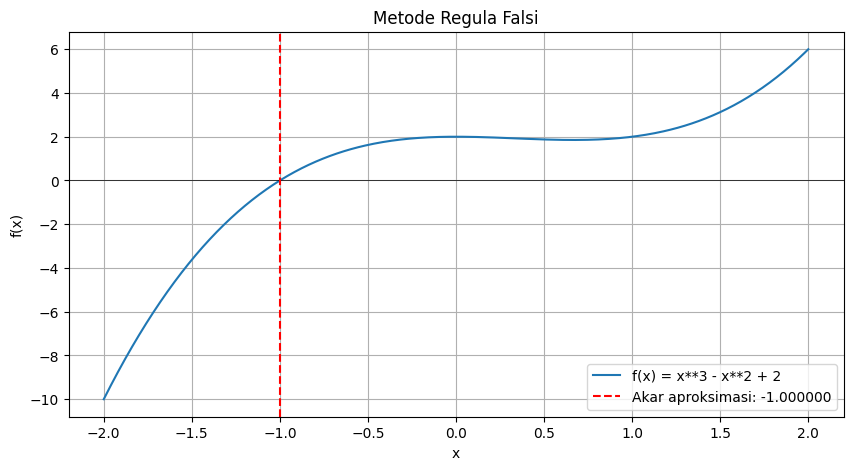

In [4]:
main()